# Introduction

Pandas is a highly versatile Python library for data manipulation and analysis, built on top of the NumPy package. Its core data structures, __Series__ and __DataFrame__, are specifically designed to handle structured data.

A DataFrame organizes data into rows (of observations) and columns (of variables), making it ideal for storing and processing tabular data. Pandas’s efficiency and flexibility have made it an essential tool for researchers and physicists like yourself 😁

## What is a DataFrame?

A DataFrame is a two-dimensional, labeled data structure in Pandas, with columns that can hold data of different types. It’s similar to a spreadsheet. As one of the most commonly used Pandas objects, a DataFrame organizes data into:
- __Rows__: Representing individual records or observations.
- __Columns__: Representing variables or attributes.

### Checking the Pandas version

Before we start, it’s important to check if you have Pandas installed on your machine and verify its version, as Pandas is essential for this part of the tutorial. Since you’re now familiar with Conda and the terminal, you can easily perform this check using the terminal in Visual Studio Code.

To open the terminal in Visual Studio Code, click on `Terminal` in the top menu and then select `New Terminal`.

One way to check the whether you have Pandas installed is to run the following command in the terminal, using conda is:

- Activate your conda environment by running the following command in the terminal:
```bash
conda activate <your_env_name>
```
- Check if Pandas is installed:
```bash
conda list pandas
```

- If, for some reason, you don't have Pandas installed, you can install it by running the following command in the terminal:
```bash
conda install pandas
``` 
and then you can verify the installation by running the `conda list pandas` command again.

### Creating a DataFrame

A DataFrame can be created from various data types, including lists, dictionaries, NumPy arrays, or external sources such as CSV and Excel files.

In [ ]:
# Creating a DataFrame from a Dictionary
import pandas as pd

# Sample data
data = {
    "Time (s)": [0, 1, 2, 3],
    "Position (m)": [0, 5, 20, 45],
    "Velocity (m/s)": [0, 5, 10, 15]
}

# Create a DataFrame
df = pd.DataFrame(data)

print(df)

   Time (s)  Position (m)  Velocity (m/s)
0         0             0               0
1         1             5               5
2         2            20              10
3         3            45              15


In [14]:
# Loading a DataFrame from a CSV File

import pandas as pd

# Load data from a CSV file
df = pd.read_csv("data.csv")
# print(df) # Display the DataFrame
# print(df.head()) # Display the first 5 rows

## Inspecting DataFrames

Pandas provides several functions to inspect the contents of a DataFrame, including:
- `head()`: Displays the first few rows of a DataFrame, e.g., `df.head()` displays the first five rows (default is 5).
- `tail()`: Displays the last few rows of a DataFrame.
- `info()`: Displays a summary of the DataFrame, including the data types and missing values.
- `describe()`: Displays a statistical summary of the DataFrame.
- `shape`: Returns the dimensions of the DataFrame (rows, columns).
- `columns`: Returns the column labels of the DataFrame.
- `index`: Returns the row labels of the DataFrame,
and so on.

🐍 Try it out for yourself using the sample data.csv.

## Basic DataFrame Operations

Pandas provides a wide range of operations to manipulate and analyze DataFrames. These operations are invaluable for data cleaning, transformation, and analysis.

An example scenario you might find yourself in as a junior researcher is analyzing experimental results. For instance, imagine you have a dataset containing time-series data from a physics experiment, such as measurements of position, velocity, and acceleration over time. You might need to clean the data by handling missing values, filter rows based on specific conditions (e.g., velocity exceeding a threshold), calculate metrics like energy or force, and visualize trends to interpret your results.

Pandas simplifies these tasks, enabling you to focus on extracting insights from your data rather than writing complex code to manipulate it.

### Slicing and Indexing

You've already encountered slicing and indexing in its general form in Python. Pandas extends these concepts to DataFrames, allowing you to select specific rows and columns based on labels or positions.

__Accessing Rows and Columns__:

- __Columns__: You can access columns using their labels as attributes, e.g., `df.column_name` or as keys, e.g., `df['column_name']`.
- __Rows__: You can access rows using the `loc[]` and `iloc[]` methods. `loc[]` is label-based (meaning you specify the row label), while `iloc[]` is integer position-based (meaning you specify the row index).

In [17]:
# Access a column

print(df["Position"])

# Access a specific row
print(df.loc[2]) # Access row with label 2
print(df.iloc[2]) # Access the third row by position

0      0
1      5
2     20
3     45
4     80
5    100
Name: Position, dtype: int64
Time         2
Position    20
Name: 2, dtype: int64
Time         2
Position    20
Name: 2, dtype: int64


__Slicing Rows and Columns:__

You can slice rows and columns in a DataFrame using the `loc[]` and `iloc[]` methods:
- _Label-based slicing_: Use `df.loc[row_labels, column_labels]` to select specific rows and columns based on their labels.
_Example_: `df.loc[1:3, 'column_name']` selects rows 1 to 3 for the specified column.

- _Position-based slicing_: Use `df.iloc[row_indices, column_indices]` to slice rows and columns based on their integer positions.

This approach provides flexibility for accessing subsets of data efficiently.

In [19]:
# Slice rows and columns
print(df.loc[1:3, ["Time", "Position"]])
print(df.iloc[0:2, 0:2])

   Time  Position
1     1         5
2     2        20
3     3        45
   Time  Position
0     0         0
1     1         5


### Filtering Data

Filtering data is a common task in data analysis. You can filter rows based on specific conditions using boolean indexing. This simply means creating a list of True or False values, where each value indicates whether a row meets the condition. The rows with True are included in the filtered DataFrame, while the others are excluded.

In [26]:
## Filter rows where Position > 20

# The boolean condition returns a Series of True and False values
condition = df["Position"] > 20
filtered_data = df[condition]

# Alternatively, you can combine the two steps into one line of code
# filtered_data = df[df["Position"] > 20]

print(filtered_data)

   Time  Position
3     3        45
4     4        80
5     5       100


### Modifying Columns

Pandas allows you to modify columns in a DataFrame by performing operations on them. You can create new columns, update existing columns, or apply functions to transform column values. This flexibility is essential for data cleaning. For example, you might need to convert units or calculate derived metrics. Let us take a look at some of the common operations you can perform on columns:

In [37]:
## Add a new column

# Here we're adding a new column called "Velocity" to the DataFrame by dividing the "Position" column by the "Time" column. Pretty cool, right?
df["Velocity"] = df["Position"] / df["Time"]
print(df)

   Time  Position  Velocity
0     0         6       inf
1     1        11      11.0
2     2        26      13.0
3     3        51      17.0
4     4        86      21.5
5     5       106      21.2


In [38]:
## Updating an existing column

# Let's say we want to update the "Position" column by adding 2 to each value. We can do this by simply adding 2 to the column.
df["Position"] += 2
print(df)

   Time  Position  Velocity
0     0         8       inf
1     1        13      11.0
2     2        28      13.0
3     3        53      17.0
4     4        88      21.5
5     5       108      21.2


💡 In Python, `x += 2` is equivalent to `x = x + 2`.

__Deleting Columns__:

You can delete columns in a DataFrame using the `drop()` method. For example, `df.drop('column_name', axis=1)` removes the specified column. The `axis=1` argument specifies that a column (not a row) is being deleted. To delete multiple columns, you can pass a list of column names, such as `df.drop(['column1', 'column2'], axis=1)`.

You may also encounter the `inplace=True` argument, which modifies the DataFrame directly without creating a new one. This can be helpful when you want to update the existing DataFrame rather than creating a separate copy.

In [39]:
## Deleting a column

df.drop(columns=["Velocity"], inplace=True)
print(df)

   Time  Position
0     0         8
1     1        13
2     2        28
3     3        53
4     4        88
5     5       108


## Close to the End: A Mock Scenario

Let’s simulate importing and analyzing real-world experimental data. Suppose we have data from a Physics experiment stored in experiment_data.csv. The dataset contains columns for Time, Position, Velocity, and Acceleration.

In [41]:
# Step 1: Load the data

df = pd.read_csv("experiment_data.csv") # Load the data from the CSV file
print(df.head()) # Display the first 5 rows (default is 5)

   Time  Position  Velocity  Acceleration
0     0         0         0             0
1     1         5         5             5
2     2        20        10             5
3     3        45        15             5
4     4        80        20             5


In [42]:
# Step 2: Clean the data

# Fill missing values with 0, if any
df.fillna(0, inplace=True)

# Drop rows with any missing values, if any
df.dropna(inplace=True)

In [47]:
# Step 3: Analyze the data

# Calculate mean velocity
mean_velocity = df["Velocity"].mean()

print(f"Mean Velocity: {mean_velocity:.2f} m/s") # Display the mean velocity with 2 decimal places

# Filter rows where Acceleration > 2 m/s^2
high_acceleration = df[df["Acceleration"] > 2] # Play with the threshold value to see different results
high_velocity = df[df["Velocity"] > 10] # Play with the threshold value to see different results

print(high_acceleration)
print(high_velocity)

Mean Velocity: 25.00 m/s
    Time  Position  Velocity  Acceleration
1      1         5         5             5
2      2        20        10             5
3      3        45        15             5
4      4        80        20             5
5      5       125        25             5
6      6       180        30             5
7      7       245        35             5
8      8       320        40             5
9      9       405        45             5
10    10       500        50             5
    Time  Position  Velocity  Acceleration
3      3        45        15             5
4      4        80        20             5
5      5       125        25             5
6      6       180        30             5
7      7       245        35             5
8      8       320        40             5
9      9       405        45             5
10    10       500        50             5


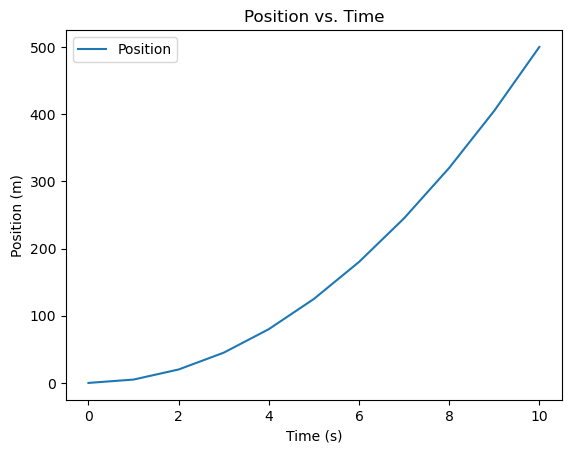

In [48]:
# Step 4: Visualize the data (I know we haven't covered this yet, so treat this as a teaser)

import matplotlib.pyplot as plt

# Plot Position vs. Time

df.plot(x="Time", y="Position", kind="line", title="Position vs. Time")

plt.xlabel("Time (s)")
plt.ylabel("Position (m)")

plt.show()

As a summary, Pandas is a powerful library for data manipulation and analysis, particularly for structured data. It simplifies common data operations, such as cleaning, filtering, and transforming data, enabling you to focus on extracting insights from your data. By mastering Pandas, you’ll be well-equipped to handle a wide range of data analysis tasks in your research and beyond.

This is by no means an exhaustive guide to Pandas, but it should provide a solid foundation for you to explore further 🐍